In [1]:
#Packages
import numpy as np
import random as random
    
#Functions
    
#Creates an NxN matrix with equal jumping rates and absorbers on positions A (A \in [0,N-1])
def Make_Rmatrix(N,A):
    R = np.ones((N,N))*(1./(N-1))
    #R = np.matrix( [np.ones((1,N))*.1], [np.ones((1,N))*.15], [np.ones((1,N))*.25], [np.ones((1,N))*.3], [np.ones((1,N))*.05] )
    for i in range(N):
        R[i,i] = 0
        sum = 0
        for j in range(N):
            sum = sum + R[i,j]
        R[i,i] = -sum 
        for el in A:  #Absorber
            R[i,el] = 0
    return R, A

#Creates an R matrix of BD-process. A \in {{0},{1},{0,1}}. K are the rates
def Make_RmatrixBD(A,K):
    N = 1+(len(K)+len(A))/2
    R = np.zeros((N,N))
    i = 0
    if 0 not in A:
        R[0,0] = -K[0]
        R[1,0] = K[0]
        i = 1
    for j in range(N-len(A)):
        j = j+1
        R[j-1,j] = K[i]
        R[j+1,j] = K[i+1]
        R[j,j]   = -K[i+1]-K[i]
        i = i+2
    if 1
        

#def Make_RmatrixBD(A,K):
#    if len(K)%2 == 1:
#        return 'Input a K vector of an even length'
#    N = int(len(K)/2)
#    R = np.zeros((N/2,N/2))
#    for i in range(1,N-1):
#        R[i,i-1] = K[2*i-1]
#        R[i,i+1] = K[2*i]
#        R[i,i]   = -K[2*i-1]-K[2*i]
#    R[0,1] = K[0]
#    R[N,N-1] = K[N]
#    return R
        
    

#Sums the probabilities of R for a Monte Carlo simulation
def Make_CumR(R):
    CumR = R
    for diag in range(len(R)):
        CumR[diag,diag] = 0
    for row in range(1,len(CumR)):
        CumR[row,:] = CumR[row,:]+CumR[row-1,:]
    return CumR

#Lets a walker run through R (absorbers A), with initial position I \in [0,N-1]
def Walk(I,CumR,A):
    loc = int(I)
    path = [loc]
  
    #Determines the path of the walker
    while (loc not in A):
        p = random.random()
#        print p
        cumsum = 0
        i = -1
        while p>cumsum:
            i = i + 1 + ((i+1)==loc)
            cumsum = CumR[i,loc]
        loc = i
        path.append(loc)
    return path   

#Returns the paths of N walkers with initial position I (being a vector or an integer)
def N_Walks(N,I,CumR,A):
    paths = []
    #Convert I to a vector, if necessary
    if type(I) == int:
        I = np.ones((1,N))*I
#        print I
        
    for Nr_Walker in range(N):
        path = Walk(I[0,Nr_Walker],CumR,A)
#        print path
        paths.append(path)
    return paths

#Determines the time to run through the system for one path/walker
def Time(path, timestep):
    length = len(path)-1
    time = length*timestep
    return time

#Input: a list of paths. Returns the time for eacht walker in a list
def N_Time(paths,timestep):
    times = []   
    for path in paths:
        time = Time(path,timestep)
        times.append(time)
    return times


#Programs
#Calculates the average running time for N walkers on a space with equal jumping probabilities, defined by (A,S)
def General_case (A,S,N,I,Timestep):
    R, A = Make_Rmatrix(S,A)
    CumR = Make_CumR(R)
    #print R
    paths = N_Walkers(N,I,CumR,A)   #Let N walkers run through R
    #print paths
    T = N_Time(paths,Timestep)      #Calculate the time taken of every walker
    ave = np.mean(T)                #Calculate the mean of the walker
    #print T
    return ave

#Initialization
A = [0]                         #Define the absorbers
S = 10                          #Define size of the space
N = 20000                       #Define number of walkers
I = 1                           #Define initial position of walkers (Integer of vector)
Timestep = 1                    #Define how long one step takes

#Program
print Make_RmatrixBD(0,[2,4,6,8,10,13])
#print General_case(A,S,N,I,Timestep)

SyntaxError: invalid syntax (<ipython-input-1-9e8128746656>, line 36)

1
2
3
[[ 0.          1.          0.          0.          0.          0.          0.        ]
 [ 0.         -3.71828183  1.          0.          0.          0.          0.        ]
 [ 0.          2.71828183 -3.71828183  1.          0.          0.          0.        ]
 [ 0.          0.          2.71828183 -3.71828183  1.          0.          0.        ]
 [ 0.          0.          0.          2.71828183 -3.71828183  1.          0.        ]
 [ 0.          0.          0.          0.          2.71828183 -2.64872127
   0.        ]
 [ 0.          0.          0.          0.          0.          1.64872127
   0.        ]]

[[ 0.          0.26894142  0.          0.          0.          0.          0.        ]
 [ 0.         -1.          0.26894142  0.          0.          0.          0.        ]
 [ 0.          0.73105858 -1.          0.26894142  0.          0.          0.        ]
 [ 0.          0.          0.73105858 -1.          0.26894142  0.          0.        ]
 [ 0.          0.          0.  

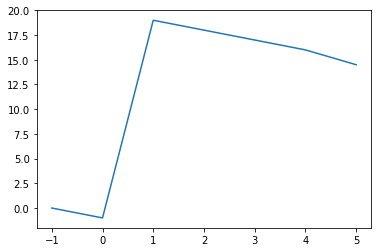

([-1, 0, 1, 2, 3, 4, 5], [0, -1, 19, 18, 17, 16, 14.5])

In [262]:
# Packages
import numpy as np
import random as random
import math as m
import matplotlib.pyplot as plt
    
#Functions

#Creates an (N+|A|)x(N+|A|) R matrix given the absorbers (A), the set of deltas (d) and the location of incorrect base pairs (I)
def Make_RmatrixCC(N,A,Di,Dc,Dpam,Dclv,I):
    R = np.zeros((N,N))
    i = 1
    
    for j in range(N-2):
        print i
        R[i-1,i] = 1
        R[i+1,i] = m.exp(-Di)*(i in I) + m.exp(Dc)*(i not in I)
        R[i,i] = -R[i-1,i]-R[i+1,i]
        i = i+1
    
    if 0 in A:  #Is there a PAM?
        R = np.hstack((np.zeros((N,1)),R))    #Add a column and row for the absorber (PAM)
        R = np.vstack((np.zeros((1,N+1)),R))
        N = N+1
        i = 1
        R[2,i] = m.exp(Dpam)
        R[0,i] = 1
        R[1,i] = -R[0,i]-R[2,i]     
    else:
        i = 0
        R[1,i] = 1
        R[0,i] = -R[1,i]
    
    #Does it cleave?
    if 1 in A:
        R = np.hstack((R,np.zeros((N,1))))
        R = np.vstack((R,np.zeros((1,N+1))))
        i = N
        R[i,i-1] = m.exp(-Dclv-Di*((N-2) in I)+Dc*((N-2) not in I))
        R[i-2,i-1] = 1
        R[i-1,i-1] = -R[i-2,i-1]-R[i,i-1]   
    else:
        i = N-1
        R[i-1,i] = 1
        R[i,i]   = -R[i-1,i]

    return R



#Normalizes an NxN matrix R with, assuming the diagonal contains the negative sum of each column.
def NormR(R):
    NormR = R
    N = len(R)-1
    
    for diag in range(1,N):
        norm = -R[diag,diag]
        if norm is not 0:
            NormR[diag,diag] = NormR[diag,diag]/norm
            NormR[diag-1,diag] = NormR[diag-1,diag]/norm
            NormR[diag+1,diag] = NormR[diag+1,diag]/norm
            
    #Zeroth column
    norm0 = -NormR[0,0]
    if not(abs(norm0) < 1e-5):
        NormR[0,0] = NormR[0,0]/norm0
        NormR[1,0] = NormR[1,0]/norm0
        
    #Nth column
    normN = -NormR[N,N]
    if not(abs(normN) < 1e-5):
        NormR[N,N] = NormR[N,N]/normN
        NormR[N-1,N] = NormR[N-1,N]/normN
        
    return NormR

#Lets a walker run through R (absorbers A), with initial position I \in [0,N-1]
def Walk(I,NormR,A):
    loc = int(I)
    path = [loc]
    
    if 1 in A:
        Abs = set(A)
        Abs.remove(1)
        Abs.add(len(NormR)-1)
  
    #Determines the path of the walker
    while (loc not in Abs):
        p = random.random()
#        print p
        if p < NormR[loc-1,loc]:
            loc = loc - 1
        else:
            loc = loc + 1
        path.append(loc)
    return path   

#Returns the paths of N walkers with initial position I (being a vector or an integer)
def N_Walks(N,I,NormR,A):
    paths = []
    #Convert I to a vector, if necessary
    if type(I) == int:
        I = np.ones((1,N))*I
#        print I
        
    for Nr_Walker in range(N):
        path = Walk(I[0,Nr_Walker],NormR,A)
#        print path
        paths.append(path)
    return paths


def Braket(M,I):
    Minv = M.I
    sum = 0
    for el in range(len(Minv)):
        sum = sum + Minv[el,I]
    return sum


def Make_plot(n, A, Dpam, Dc, Di, Dclv, E):
    En = 0     #Initial Energy
    N  = [-1]  #(Initial) Position in state space
    EL = [En]   #(Initial) Energy level
    if 0 in A:
        En = En - Dpam
        EL.append(En)
        N.append(0)
        
    for i in range(0,n-1):
        N.append(i+1)
        if i in E:
            En = En + Di
        else:
            En = En - Dc
        EL.append(En)
    
    if 1 in A:
        N.append(n)
        if n-1 in E:
            En = En + Di - Dclv
        else:
            En = En - Dc - Dclv
        EL.append(En)
    
    plt.plot(N,EL)
    plt.show()
    return N, EL
        


#Determines the Length of the path of one walker
def Length(path):
    length = len(path)-1
    return length

#Returns the average length of the walkers' paths
def N_Lengths(paths):
    lengths = []   
    for path in paths:
        length = Length(path)
        lengths.append(length)
    ave = np.mean(lengths)
    return ave

#Counts the number of cleavages vs. drops
def Count(paths):
    Nr_clv = 0
    Nr_drop = 0
    for path in paths:
        if path[-1] is 0:
            Nr_drop = Nr_drop+1
        else:
            Nr_clv = Nr_clv+1
    return (Nr_drop, Nr_clv)
            

N     = 5       #Size of state space excluding the absorbers (PAM and cleavage)
A     = {0,1}   #Presence of absorbers, PAM (0) and/or cleavage (1)
Dpam  = 1
Dc    = 1
Di    = 20
Dclv  = .5
E     = {0}     #Incorrect base pairs
I     = 1       #Initial positions
R   = Make_RmatrixCC(N,A,Di,Dc,Dpam,Dclv,E)
print R
print
NormR = NormR(R)
print NormR
paths = N_Walks(10000,I,R,A)
print N_Lengths(paths)
print Count(paths)
Make_plot(N,A,Dpam,Dc,Di,Dclv,E)

In [20]:
#test met matrices in Python
import numpy as np
A = np.matrix( [[1,2,3],[11,12,13],[21,22,23]]) # Creates a matrix.
x = np.matrix( [[1],[2],[3]] )                  # Creates a matrix (like a column vector).
y = np.matrix( [[1,2,3]] )                      # Creates a matrix (like a row vector).
print A.T                                    # Transpose of A.
print A*x                                    # Matrix multiplication of A and x.
print A.I                                    # Inverse of A.
#print linalg.solve(A, x)     # Solve the linear equation system.
print A[0,0]
B = np.ones((3,4))
print B*[1,2,3,4]

print A[1,2]

[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]]
[[ 14]
 [ 74]
 [134]]
[[  3.00239975e+14  -6.00479950e+14   3.00239975e+14]
 [ -6.00479950e+14   1.20095990e+15  -6.00479950e+14]
 [  3.00239975e+14  -6.00479950e+14   3.00239975e+14]]
1
[[ 1.  2.  3.  4.]
 [ 1.  2.  3.  4.]
 [ 1.  2.  3.  4.]]
13


0.158509364816


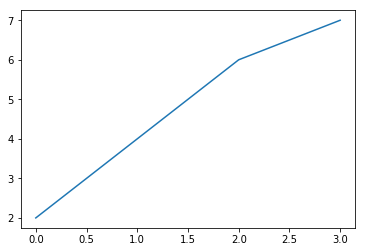

In [104]:
import random as random
print random.random()
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [2,4,6,7]
plt.plot(y)
plt.show()

In [42]:
import numpy as np
import math as m

A = np.matrix([[.1,.2,.3,.4],[.2,.3,.4,.5],[4,5,6,7]])
B = [1,2,3,4]
print len(A)
print (A) 

print (5 not in B)*5
int(3.4)
print range(1,3)

for el in range(1,len(A)):
    A[el,:] = A[el,:]+A[el-1,:]
print A
print A/3

print type([0,1,2]) == list
print type('abc') == str
print np.matrix([[.1, .1, .1], [.2, .2, .2]])
C =  np.ones((2,5))*.2
print C
print np.hstack([C,np.ones((2,1))])
print np.mean(B)
print np.zeros((3))
print [0%2, 1%2, 2%2, 3%2]
print A[0,3]
print m.exp(1)
print range(1,5)
print range(5)
a = [1,2,3]
print a[-1]

3
[[ 0.1  0.2  0.3  0.4]
 [ 0.2  0.3  0.4  0.5]
 [ 4.   5.   6.   7. ]]
5
[1, 2]
[[ 0.1  0.2  0.3  0.4]
 [ 0.3  0.5  0.7  0.9]
 [ 4.3  5.5  6.7  7.9]]
[[ 0.03333333  0.06666667  0.1         0.13333333]
 [ 0.1         0.16666667  0.23333333  0.3       ]
 [ 1.43333333  1.83333333  2.23333333  2.63333333]]
True
True
[[ 0.1  0.1  0.1]
 [ 0.2  0.2  0.2]]
[[ 0.2  0.2  0.2  0.2  0.2]
 [ 0.2  0.2  0.2  0.2  0.2]]
[[ 0.2  0.2  0.2  0.2  0.2  1. ]
 [ 0.2  0.2  0.2  0.2  0.2  1. ]]
2.5
[ 0.  0.  0.]
[0, 1, 0, 1]
0.4
2.71828182846
[1, 2, 3, 4]
[0, 1, 2, 3, 4]
3
